# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of a traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

## Visualizing label distribution

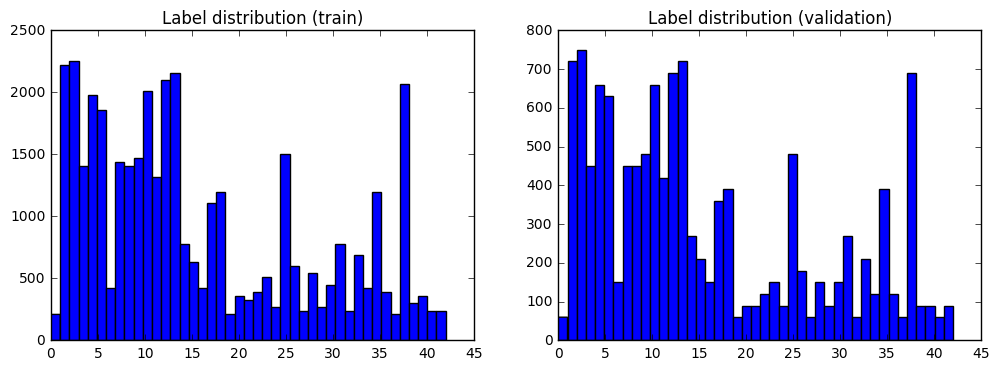

In [4]:
fig = plt.figure(figsize=(12, 4))
fig.add_subplot(1, 2, 1)
plt.hist(y_train, bins=n_classes)
plt.title("Label distribution (train)")

fig.add_subplot(1, 2, 2)
plt.hist(y_test, bins=n_classes)
plt.title("Label distribution (validation)")

## Visualizing samples for each class

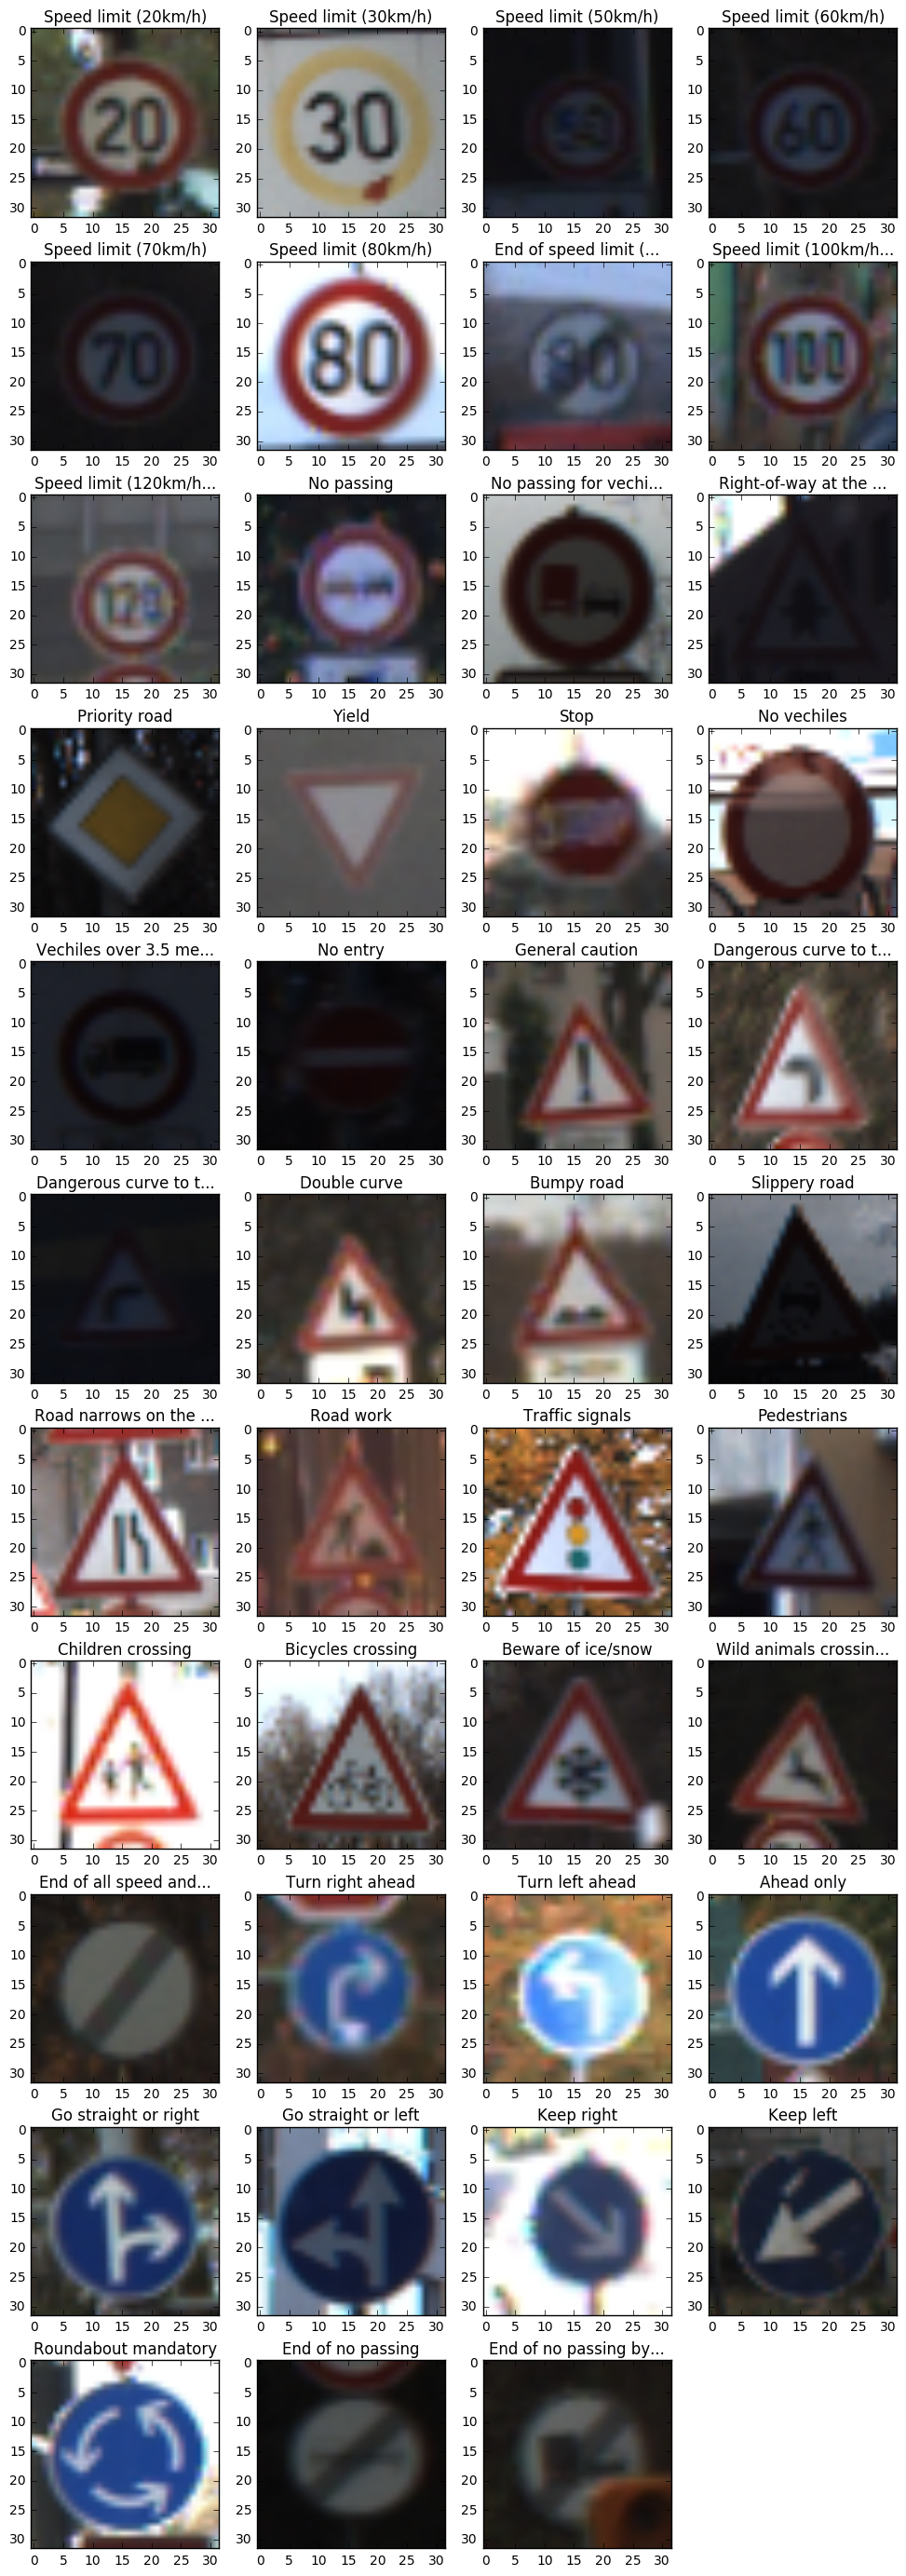

In [5]:
import pandas as pd

label_names = pd.read_csv('signnames.csv')

fig = plt.figure(figsize=(12, 35))

for i in range(n_classes):
    name = label_names.iloc[i]['SignName']
    name = (name[:20] + '...') if len(name) > 20 else name
    fig.add_subplot(11, 4, i + 1, title=name)
    choice = np.random.choice(np.where(y_train == i)[0])
    plt.imshow(X_train[choice])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
import cv2

GRAYSCALE = False
MEAN = []
STD = []
MEAN_GRAYSCALE = None
STD_GRAYSCALE = None

if GRAYSCALE:
    X_train = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in X_train])
    X_test = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in X_test])
#else:
#    X_train = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2YUV) for img in X_train])
#    X_test = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2YUV) for img in X_test])

X_train = X_train.astype(np.float32)
y_train = (np.arange(n_classes) == y_train[:,None]).astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = (np.arange(n_classes) == y_test[:,None]).astype(np.float32)

# split train/validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

if GRAYSCALE:
    mean = np.mean(X_train)
    std = np.std(X_train)
    X_train -= mean
    X_train /= std
    X_val -= mean 
    X_val /= std
    X_test -= mean
    X_test /= std
    MEAN_GRAYSCALE = mean
    STD_GRAYSCALE = std

else:
    # normalize each channel separately
    for channel in range(X_train.shape[3]):
        
        mean = np.mean(X_train[:, :,:,channel])
        std = np.std(X_train[:, :,:,channel])
        X_train[:,:,:,channel] -= mean
        X_train[:,:,:,channel] /= std
        X_val[:,:,:,channel] -= mean 
        X_val[:,:,:,channel] /= std
        X_test[:,:,:,channel] -= mean
        X_test[:,:,:,channel] /= std
        MEAN.append(mean)
        STD.append(std)

## Visualizing normalized images

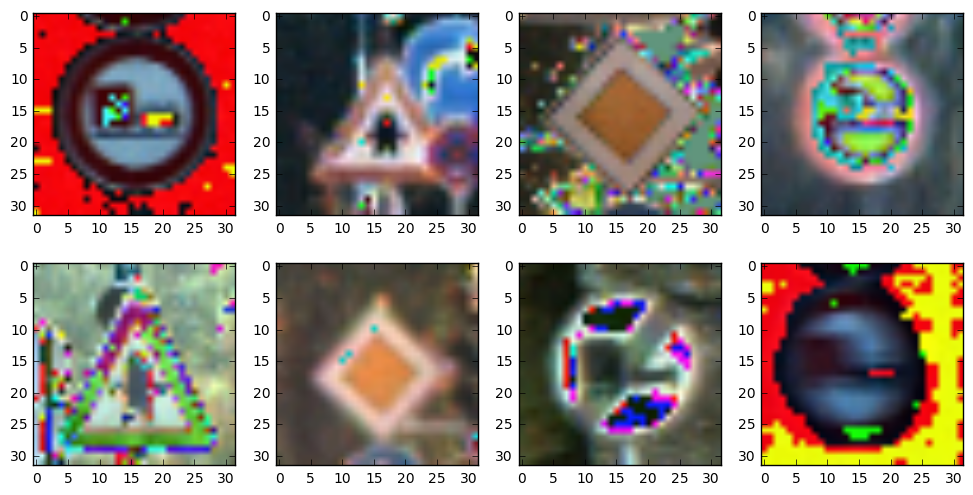

In [7]:
fig = plt.figure(figsize=(12, 35))

for i in range(8):
    fig.add_subplot(11, 4, i + 1)
    choice = np.random.randint(0, X_train.shape[0])
    
    if GRAYSCALE:
        plt.imshow(X_train[choice], cmap='gray')
    else:
        plt.imshow(X_train[choice])

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** The preprocessing involves mean subtraction and normalization as described in [CS231n Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/neural-networks-2). It is important to note that the mean and standard deviation statistics must be computed only on training data and then applied to the validation/test data. So, train/validation split is done before preprocessing. The preprocessing implementation supports grayscale and 3-channel modes.

In [5]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

import random
import math

def eulerToRotation(theta):
    ''' Calculates Rotation Matrix given euler angles. '''

    R_x = np.array([[1, 0,                  0                  ],
                    [0, math.cos(theta[0]), -math.sin(theta[0])],
                    [0, math.sin(theta[0]), math.cos(theta[0]) ]])

    R_y = np.array([[math.cos(theta[1]),  0, math.sin(theta[1])],
                    [0,                   1, 0                 ],
                    [-math.sin(theta[1]), 0, math.cos(theta[1])]])

    R_z = np.array([[math.cos(theta[2]), -math.sin(theta[2]), 0],
                    [math.sin(theta[2]), math.cos(theta[2]),  0],
                    [0,                  0,                   1]])

    R = np.dot(R_z, np.dot( R_y, R_x ))
    return R


def translation(t):
    ''' Returns a 2-dimension translation matrix '''
    T = np.array([[1, 0, t[0]],
                  [0, 1, t[1]],
                  [0, 0, 1]])
    return T


def apply_distortion(img, rotation, shift_x, shift_y, scale_x, scale_y):

    '''
    Applies shift and rotation distortion to image, assuming all points below the
    horizon are on flat ground and all points above the horizon are infinitely far away.
    The distorted image is also cropped to match the proportions used in "End to End Learning for Self-Driving Cars".
    Parameters:
    img - source image
    rotation - rotation angle in radians.
    shift_x - shift in x axis (pixels).
    shift_y - shift in y axis (pixels).
    scale_x - scale in x axis.
    scale_y - scale in y axis.
    '''
    T = translation([shift_x, shift_y])
    T = np.dot(eulerToRotation([0., 0., rotation]), T)
    img = cv2.warpPerspective(img, T, (img.shape[1], img.shape[0]))
    resized = cv2.resize(img, None, fx=scale_x, fy=scale_y, interpolation = cv2.INTER_CUBIC)
    img = np.zeros_like(img)
    shape_0 = img.shape[0] if img.shape[0] < resized.shape[0] else resized.shape[0]
    shape_1 = img.shape[1] if img.shape[1] < resized.shape[1] else resized.shape[1]
    
    if GRAYSCALE:
        img[:shape_0,:shape_1] = resized[:shape_0, :shape_1]
    else:
        img[:shape_0,:shape_1,:] = resized[:shape_0, :shape_1, :]
        
    return img

def apply_random_distortion(img):
    rotation = random.uniform(-math.pi/12, math.pi/12)
    shift_x = random.randint(-2,2)
    shift_y = random.randint(-2,2)
    scale_x = random.uniform(.9, 1.1)
    scale_y = random.uniform(.9, 1.1)
    return apply_distortion(img, rotation, shift_x, shift_y, scale_x, scale_y)

## Visualizing jittered images

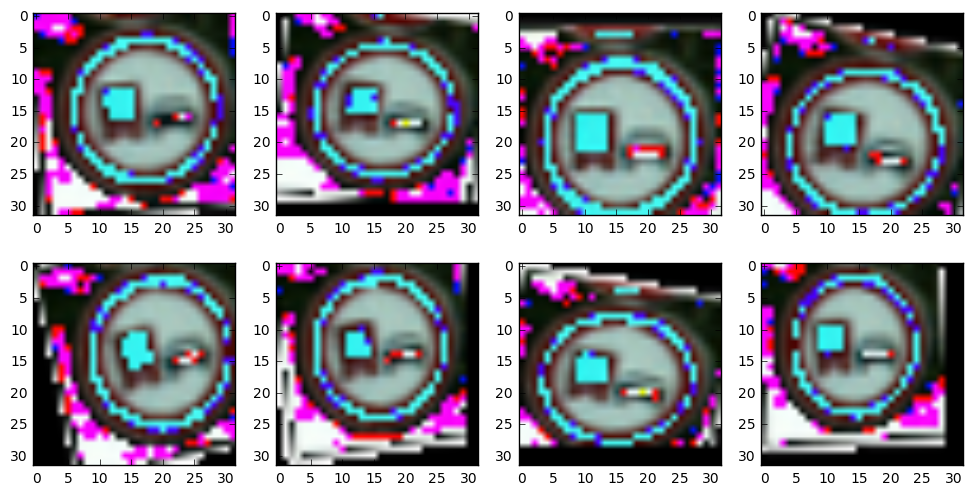

In [11]:
choice = np.random.randint(0, X_train.shape[0])
img = X_train[choice]

fig = plt.figure(figsize=(12, 35))

for i in range(8):
    fig.add_subplot(11, 4, i + 1)
    
    if GRAYSCALE:
        plt.imshow(apply_random_distortion(img), cmap='gray')
    else:
        plt.imshow(apply_random_distortion(img))

## Generating jittered dataset

In [25]:
X_train_aug = []
y_train_aug = []
augmentation_factor = 5

for index, img in enumerate(X_train):
    for i in range(augmentation_factor):
        X_train_aug.append(apply_random_distortion(img))
        y_train_aug.append(y_train[index])
        
X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)
print(X_train_aug.shape, y_train_aug.shape)

(147030, 32, 32, 3) (147030, 43)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** Train/validation split is done before data preprocessing (please refer to preprocessing step in question 1). Validation set size is 25% percent of original training data. Data augmentation is implemented as specified in the paper [Traffic Sign Recognition with Multi-Scale Convolutional Networks](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf): "Samples are randomly perturbed in position ([-2,2] pixels), in scale ([.9,1.1] ratio) and rotation ([-15,+15] degrees)".

### Defining placeholders

In [6]:
import tensorflow as tf
import math

if GRAYSCALE:
    x = tf.placeholder(tf.float32, [None, X_train.shape[1], X_train.shape[2]])
else:
    x = tf.placeholder(tf.float32, [None, X_train.shape[1], X_train.shape[2], X_train.shape[3]])

keep_prob = tf.placeholder(tf.float32, [])

# Reshape from 2D to 4D. This prepares the data for
# convolutional and pooling layers.
if GRAYSCALE:
    x_reshape = tf.reshape(x, (-1, 32, 32, 1))
else:
    x_reshape = tf.reshape(x, (-1, 32, 32, 3))

### LeNet-5 graph

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Graph for LeNet-5
if GRAYSCALE:
    W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 6], stddev=1.0 / math.sqrt(5 * 5)))
else:
    W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 3, 6], stddev=1.0 / math.sqrt(5 * 5)))

b_conv1 = tf.Variable(tf.zeros(6))
conv1 = tf.nn.bias_add(tf.nn.conv2d(x_reshape, W_conv1, [1, 1, 1, 1], 'VALID'), b_conv1)
conv1 = tf.nn.relu(conv1)
conv1 = tf.nn.max_pool(conv1, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')

W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], stddev=1.0 / math.sqrt(5 * 5 * 6)))
b_conv2 = tf.Variable(tf.zeros(16))
conv2 = tf.nn.bias_add(tf.nn.conv2d(conv1, W_conv2, [1, 1, 1, 1], 'VALID'), b_conv2)
conv2 = tf.nn.relu(conv2)
conv2 = tf.nn.max_pool(conv2, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')

flat = tf.contrib.layers.flatten(conv2)
W_fc1 = tf.Variable(tf.truncated_normal([400, 120], stddev=1.0 / math.sqrt(400)))
b_fc1 = tf.Variable(tf.zeros(120))
fc1 = tf.matmul(flat, W_fc1) + b_fc1
fc1 = tf.nn.relu(fc1)
fc1_drop = tf.nn.dropout(fc1, keep_prob)

W_fc2 = tf.Variable(tf.truncated_normal([120, 43], stddev=1.0 / math.sqrt(120)))
b_fc2 = tf.Variable(tf.zeros(43))
logits = tf.matmul(fc1_drop, W_fc2) + b_fc2

### The 'Cifar' model
A more complex model based on [this TensorFlow example](https://github.com/tensorflow/tensorflow/blob/r0.11/tensorflow/models/image/cifar10/cifar10.py).

In [7]:
if GRAYSCALE:
    W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 64], stddev=1.0 / math.sqrt(5 * 5)))
else:
    W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 3, 64], stddev=1.0 / math.sqrt(5 * 5 * 3)))

b_conv1 = tf.Variable(tf.zeros(64))
conv1 = tf.nn.bias_add(tf.nn.conv2d(x_reshape, W_conv1, [1, 1, 1, 1], 'SAME'), b_conv1)
conv1 = tf.nn.relu(conv1)
conv1 = tf.nn.max_pool(conv1, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
#conv1 = tf.nn.lrn(conv1, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm1')

W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 64, 64], stddev=1.0 / math.sqrt(5 * 5 * 64)))
b_conv2 = tf.Variable(tf.zeros(64))
conv2 = tf.nn.bias_add(tf.nn.conv2d(conv1, W_conv2, [1, 1, 1, 1], 'SAME'), b_conv2)
conv2 = tf.nn.relu(conv2)
conv2 = tf.nn.max_pool(conv2, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
#conv2 = tf.nn.lrn(conv2, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm2')

flat = tf.contrib.layers.flatten(conv2)
dim = flat.get_shape()[1].value

W_fc1 = tf.Variable(tf.truncated_normal([dim, 384], stddev=1.0 / math.sqrt(dim)))
b_fc1 = tf.Variable(tf.zeros(384))
fc1 = tf.matmul(flat, W_fc1) + b_fc1
fc1 = tf.nn.relu(fc1)
fc1_drop = tf.nn.dropout(fc1, keep_prob)

W_fc2 = tf.Variable(tf.truncated_normal([384, 192], stddev=1.0 / math.sqrt(384)))
b_fc2 = tf.Variable(tf.zeros(192))
fc2 = tf.matmul(fc1_drop, W_fc2) + b_fc2
fc2 = tf.nn.relu(fc2)
fc2_drop = tf.nn.dropout(fc2, keep_prob)

W_fc3 = tf.Variable(tf.truncated_normal([192, 43], stddev=1.0 / math.sqrt(192)))
b_fc3 = tf.Variable(tf.zeros(43))
logits = tf.matmul(fc2_drop, W_fc3) + b_fc3

### Traning and evaluation ops

In [8]:
y = tf.placeholder(tf.float32, [None, n_classes])
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
opt = tf.train.AdamOptimizer()
train_op = opt.minimize(loss_op)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** Two architectures were tested.

** LeNet-5 **

* First convolutional layer: filter shape = (5, 5, 3) and stride = 1
* Activation: ReLU
* Max pool: filter size (2, 2) and stride = 2
* Second convolutional layer: filter shape = (5, 5, 64) and stride = 1
* Activation: ReLU
* Max pool: filter size (2, 2) and stride = 2
* Fully connected layer: 120 hidden units
* Activation: ReLU
* Dropout: after the fully connected layer we add a dropout layer for regularization
* Output layer: logits with shape = (43) (one for each class)

** 'Cifar' **

* First convolutional layer: filter shape = (5, 5, 3) and stride = 1
* Activation: ReLU
* Max pool: filter size (2, 2) and stride = 2
* Second convolutional layer: filter shape = (5, 5, 64) and stride = 1
* Activation: ReLU
* Max pool: filter size (2, 2) and stride = 2
* Fully connected layer: 384 hidden units
* Activation: ReLU
* Dropout: after the fully connected layer we add a dropout layer for regularization
* Fully connected layer: 192 hidden units
* Activation: ReLU
* Dropout: after the fully connected layer we add a dropout layer for regularization
* Output layer: logits with shape = (43) (one for each class)

### Checkpoint restore utility

In [9]:
import os
from datetime import datetime

def restore_checkpoint(session, saver, checkpoint_dir='./checkpoints', restore_step=None):
    
    checkpoint_file = os.path.join(checkpoint_dir, 'model.ckpt')
    
    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)
    
    ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
    if ckpt and ckpt.model_checkpoint_path:
        # Restores from checkpoint
        if not restore_step:
            saver.restore(session, ckpt.model_checkpoint_path)
            global_step = int(ckpt.model_checkpoint_path.split('/')[-1].split('-')[-1])
        else:
            saver.restore(session, '{}-{}'.format(checkpoint_file, restore_step))
            global_step = restore_step

        print('{}: Checkpoint step: {}'.format(datetime.now(), global_step))
    else:
        global_step = 0
        print('{}: No checkpoint found'.format(datetime.now()))
        session.run(tf.initialize_all_variables())
        
    return global_step

### Traning and evaluation functions

In [27]:
### Train your model here.
### Feel free to use as many code cells as needed.

NUM_EPOCHS = 20
BATCH_SIZE = 32

def eval_data(data, labels, loss_op, accuracy_op):
    
    steps_per_epoch = labels.shape[0] // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE
    total_acc, total_loss = 0, 0
    session = tf.get_default_session()
    
    for step in range(steps_per_epoch):
        
        offset = (step * BATCH_SIZE) % (labels.shape[0] - BATCH_SIZE)
        batch_data = data[offset:(offset + BATCH_SIZE)]
        batch_labels = labels[offset:(offset + BATCH_SIZE)]
        
        eval_loss, eval_acc = session.run([loss_op, accuracy_op], 
                                       feed_dict={x: batch_data, y: batch_labels, keep_prob: 1.0})
        
        total_loss += (eval_loss * batch_data.shape[0])
        total_acc += (eval_acc * batch_data.shape[0])
        
    return total_loss/num_examples, total_acc/num_examples

def train(X_train, y_train, checkpoint_dir='./checkpoints'):
    
    CKPT_FILE = os.path.join(checkpoint_dir, 'model.ckpt')
    
    with tf.Session() as sess:

        #sess.run(tf.initialize_all_variables())
        saver = tf.train.Saver()

        global_step = restore_checkpoint(sess, saver, checkpoint_dir=checkpoint_dir)

        steps_per_epoch = y_train.shape[0] // BATCH_SIZE
        num_examples = steps_per_epoch * BATCH_SIZE

        for epoch in range(global_step, NUM_EPOCHS):

            print("EPOCH {} ...".format(epoch+1))

            for step in range(steps_per_epoch):

                offset = (step * BATCH_SIZE) % (y_train.shape[0] - BATCH_SIZE)
                # Generate a minibatch.
                batch_data = X_train[offset:(offset + BATCH_SIZE)]
                batch_labels = y_train[offset:(offset + BATCH_SIZE)]

                _, train_loss = sess.run([train_op, loss_op], 
                                         feed_dict={x: batch_data, y: batch_labels, keep_prob: 0.5})

                if step % 200 == 0:
                    print("Training loss = {:.3f}".format(train_loss))

            global_step += 1
            filename = saver.save(sess, CKPT_FILE, global_step=global_step)
            print("Model saved in file: %s" % filename)

            val_loss, val_acc = eval_data(X_val, y_val, loss_op, accuracy_op)
            print("Validation loss = {:.3f}".format(val_loss))
            print("Validation accuracy = {:.3f}".format(val_acc))
            print()

        # Evaluate on the test data
        test_loss, test_acc = eval_data(X_test, y_test, loss_op, accuracy_op)
        print("Test loss = {:.3f}".format(test_loss))
        print("Test accuracy = {:.3f}".format(test_acc))

### LeNet-5 traning (no augmentation)

In [19]:
train(X_train, y_train, checkpoint_dir='ckp_lenet')

2016-12-28 23:20:24.580027: No checkpoint found
EPOCH 1 ...
Training loss = 3.820
Training loss = 1.906
Training loss = 1.216
Training loss = 0.348
Training loss = 1.032
Model saved in file: ckp_lenet/model.ckpt-1
Validation loss = 0.343
Validation accuracy = 0.905

EPOCH 2 ...
Training loss = 0.457
Training loss = 0.687
Training loss = 0.349
Training loss = 0.274
Training loss = 0.370
Model saved in file: ckp_lenet/model.ckpt-2
Validation loss = 0.161
Validation accuracy = 0.957

EPOCH 3 ...
Training loss = 0.332
Training loss = 0.462
Training loss = 0.140
Training loss = 0.150
Training loss = 0.346
Model saved in file: ckp_lenet/model.ckpt-3
Validation loss = 0.115
Validation accuracy = 0.972

EPOCH 4 ...
Training loss = 0.232
Training loss = 0.311
Training loss = 0.109
Training loss = 0.083
Training loss = 0.286
Model saved in file: ckp_lenet/model.ckpt-4
Validation loss = 0.094
Validation accuracy = 0.974

EPOCH 5 ...
Training loss = 0.159
Training loss = 0.127
Training loss = 0.19

### LeNet-5 training on augmented dataset

In [13]:
train(X_train_aug, y_train_aug, checkpoint_dir='ckp_lenet_aug')

2016-12-29 13:27:16.843210: Checkpoint step: 8
EPOCH 9 ...
Training loss = 0.740
Training loss = 1.354
Training loss = 0.697
Training loss = 0.179
Training loss = 0.460
Training loss = 0.087
Training loss = 0.308
Training loss = 0.357
Training loss = 0.242
Training loss = 0.508
Training loss = 0.418
Training loss = 0.509
Training loss = 0.526
Training loss = 0.387
Training loss = 0.428
Training loss = 0.108
Training loss = 0.178
Training loss = 0.020
Training loss = 0.360
Training loss = 0.469
Training loss = 1.085
Training loss = 0.711
Training loss = 0.271
Model saved in file: ckp_lenet_aug/model.ckpt-9
Validation loss = 0.146
Validation accuracy = 0.959

EPOCH 10 ...
Training loss = 0.988
Training loss = 1.016
Training loss = 0.278
Training loss = 0.174
Training loss = 0.018
Training loss = 0.259
Training loss = 0.590
Training loss = 0.214
Training loss = 0.468
Training loss = 0.084
Training loss = 0.169
Training loss = 0.427
Training loss = 0.323
Training loss = 0.381
Training loss

### 'Cifar' traning (no augmentation)

In [30]:
train(X_train, y_train, checkpoint_dir='ckp_cifar')

2016-12-29 23:12:30.680437: Checkpoint step: 11
EPOCH 12 ...
Training loss = 0.005
Training loss = 0.261
Training loss = 0.119
Training loss = 0.044
Training loss = 0.507
Model saved in file: ckp_cifar/model.ckpt-12
Validation loss = 0.052
Validation accuracy = 0.988

EPOCH 13 ...
Training loss = 0.010
Training loss = 0.016
Training loss = 0.018
Training loss = 0.024
Training loss = 0.094
Model saved in file: ckp_cifar/model.ckpt-13
Validation loss = 0.074
Validation accuracy = 0.986

EPOCH 14 ...
Training loss = 0.020
Training loss = 0.020
Training loss = 0.004
Training loss = 0.236
Training loss = 0.952
Model saved in file: ckp_cifar/model.ckpt-14
Validation loss = 0.059
Validation accuracy = 0.987

EPOCH 15 ...
Training loss = 0.055
Training loss = 0.021
Training loss = 0.155
Training loss = 0.077
Training loss = 0.188
Model saved in file: ckp_cifar/model.ckpt-15
Validation loss = 0.053
Validation accuracy = 0.989

EPOCH 16 ...
Training loss = 0.022
Training loss = 0.006
Training lo

### 'Cifar' training on augmented dataset

In [28]:
train(X_train_aug, y_train_aug, checkpoint_dir='ckp_cifar_aug')

2016-12-29 21:19:36.849164: Checkpoint step: 10
EPOCH 11 ...
Training loss = 0.540
Training loss = 0.978
Training loss = 0.629
Training loss = 0.334
Training loss = 0.372
Training loss = 0.134
Training loss = 0.043
Training loss = 0.546
Training loss = 0.287
Training loss = 0.201
Training loss = 0.344
Training loss = 0.236
Training loss = 0.168
Training loss = 0.436
Training loss = 0.247
Training loss = 0.198
Training loss = 0.430
Training loss = 0.012
Training loss = 0.194
Training loss = 0.578
Training loss = 0.580
Training loss = 0.382
Training loss = 0.686
Model saved in file: ckp_cifar_aug/model.ckpt-11
Validation loss = 0.158
Validation accuracy = 0.951

EPOCH 12 ...
Training loss = 1.131
Training loss = 1.511
Training loss = 0.513
Training loss = 0.164
Training loss = 0.533
Training loss = 0.086
Training loss = 0.171
Training loss = 0.185
Training loss = 0.502
Training loss = 0.894
Training loss = 0.486
Training loss = 0.166
Training loss = 1.250
Training loss = 0.306
Training l

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** The two models were trained on two datasets: the original training data and an augmented (jittered) dataset with 147030 samples. Other training details are defined as follows:
* Optimizer: [Adam optmizer](https://arxiv.org/abs/1412.6980). A good optimizer that requires less tuning.
* Batch size: 32. The batch size is limited by my GPU memory (2GB)
* Epochs: the model was trained for 20 epochs
* Dropout: keep_prob = 0.5 was used for training

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** The LeNet-5 implementation was straightforward. The most difficult part was to realize how to initialize the weights and avoid the "death" of convolution layers (all units outputs equal to zero). I followed [these suggestions](http://cs231n.github.io/neural-networks-2/#init) for weights initialization by dividing the standard deviation in `tf.truncated_normal` by number of inputs. The model overfitted the original data in a few epochs of training (98.9% accuracy on validation set / 94.7% on test set). The next step was to train the model on a jittered dataset, which resulted in a worse performance on the original data (97.4% accuracy on validation set / 93% on test set), but a better generalization on new images (see step 3). The results after 20 epochs of training are summarized as follows:

| Model   | Dataset   | Validation accuracy | Test accuracy |
|---------|-----------|---------------------|---------------|
| LeNet-5 | Original  | 98.9%               | 94.7%         |
| LeNet-5 | Augmented | 97.4%               | 93.0%         |
| 'Cifar' | Original  | 98.9%               | 94.7%         |
| 'Cifar' | Augmented | 96.6%               | 90.0%         |

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

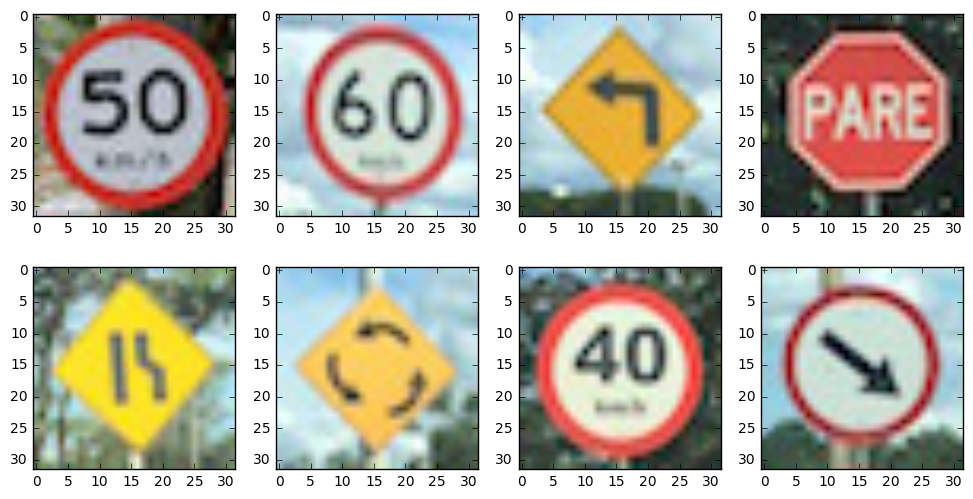

In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os

test_dir = 'test_data'
images = [plt.imread(os.path.join(test_dir, im)) for im in os.listdir(test_dir) if im.endswith('.jpg')]
images = np.array(images)

fig = plt.figure(figsize=(12, 6))

for i in range(8):
    
    if i >= len(images):
        break
        
    fig.add_subplot(2, 4, i + 1)
    plt.imshow(images[i])

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** I chose Brazilian traffic signs for testing. These signs were collected with a smartphone camera. We can see that signs with same meaning may have different background colors (e.g. "roundabout mandatory"). The STOP sign also has a different text in portuguese, which will make the test even more challenging.

### Data preprocessing and prediction

In [20]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

import pandas as pd

def preprocess(images, grayscale):
    
    norm_images = images.astype(np.float32)

    if grayscale:
        norm_images = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in norm_images])
    else:
        norm_images = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2YUV) for img in norm_images])

    if grayscale:
        norm_images -= MEAN_GRAYSCALE
        norm_images /= STD_GRAYSCALE
    else:
        # normalize each channel separately
        for channel in range(norm_images.shape[3]):
            norm_images[:,:,:,channel] -= MEAN[channel]
            norm_images[:,:,:,channel] /= STD[channel]
            
    return norm_images

def draw_predictions(predictions, images):
    
    fig = plt.figure(figsize=(12, 6))
    label_names = pd.read_csv('signnames.csv')

    for i, pred in enumerate(predictions[:8]):

        if i >= len(images):
            break

        name = label_names.iloc[pred]['SignName']
        name = (name[:20] + '...') if len(name) > 20 else name
        fig.add_subplot(2, 4, i + 1, title=name)
        plt.imshow(images[i])

def predict(images, checkpoint_dir, grayscale):

    with tf.Session() as sess:
        
        norm_images = preprocess(images, grayscale)

        saver = tf.train.Saver()
        _ = restore_checkpoint(sess, saver, checkpoint_dir=checkpoint_dir)

        prediction = tf.argmax(logits, 1)
        preds = sess.run(prediction, feed_dict={x: images, keep_prob: 1.})
        print(preds)
        return preds

### Predictions: LeNet-5 trained without data augmentation

2016-12-29 00:22:13.770769: Checkpoint step: 20
[35 35 14 14 14 14 34  1 12 12]


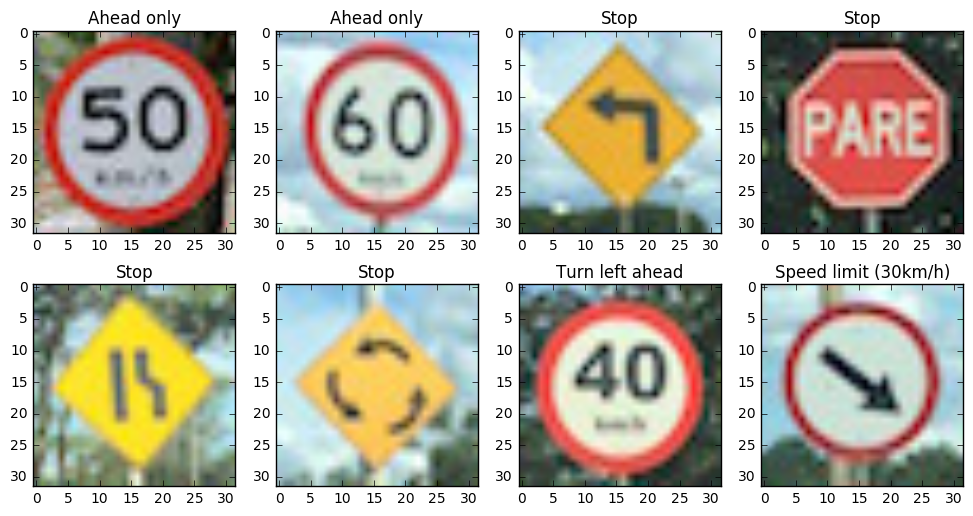

In [17]:
preds = predict(images, 'ckp_lenet', GRAYSCALE)
draw_predictions(preds, images)

### Predictions: LeNet-5 trained on augmented data

2016-12-29 13:41:40.291800: Checkpoint step: 20
[ 1  2 12 14  2  2  2 13  0 12]


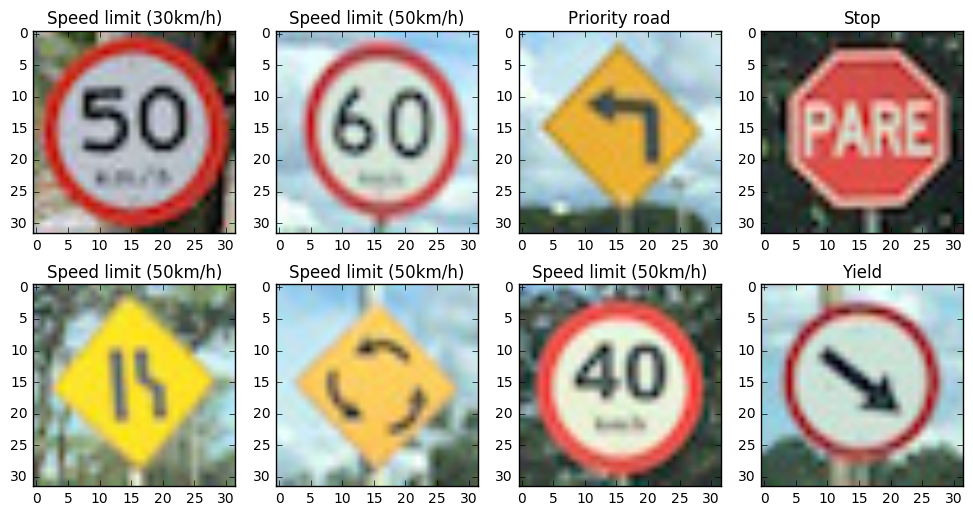

In [19]:
preds = predict(images, 'ckp_lenet_aug', GRAYSCALE)
draw_predictions(preds, images)

### Predictions: 'Cifar' trained without data augmentation

2016-12-29 23:32:23.567716: Checkpoint step: 20
[ 0 35 25 14 14 12 13  1 10 12]


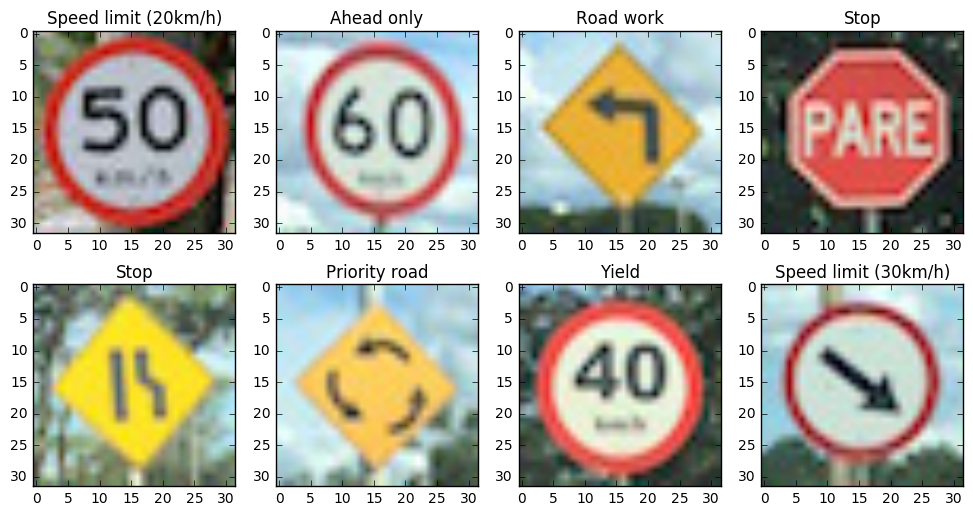

In [31]:
preds = predict(images, 'ckp_cifar', GRAYSCALE)
draw_predictions(preds, images)

### Predictions: 'Cifar' trained on augmented data

2016-12-29 22:37:51.678979: Checkpoint step: 20
[ 2  3 12 14 17 25  2  4 17 12]


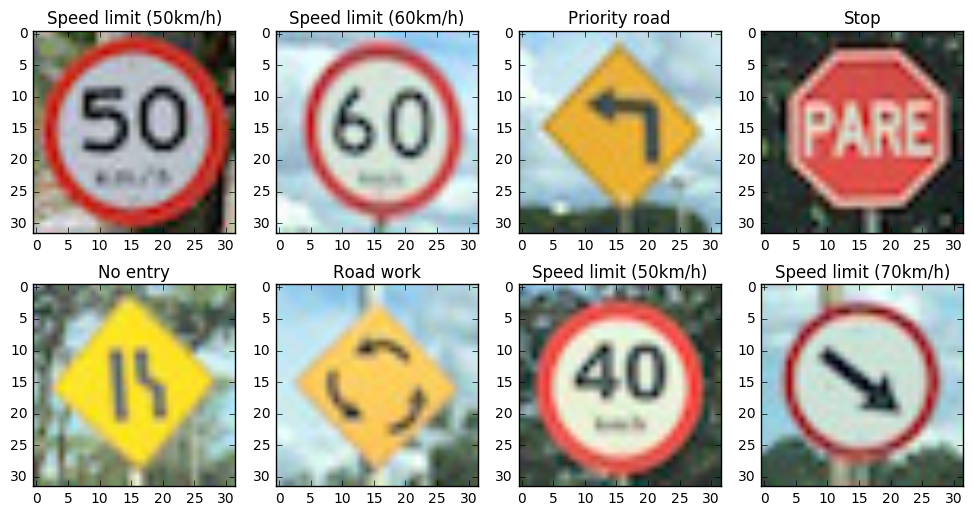

In [29]:
preds = predict(images, 'ckp_cifar_aug', GRAYSCALE)
draw_predictions(preds, images)

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** The model performs very poorly on captured pictures, with an accuracy of 3/8 = 37.5% for the best model (Cifar with data augmentation). Curiously, the model is able to predict correctly the portuguese version of the STOP sign. This suggests that the model is "paying attention" to the outer contour of the traffic sign plates (the model also tends to predict every round-shaped sign as  speed limit signs). The results also show the importance of a test set with a similar distribution to the real data in order to have a reliable estimate of model generalization (the accuracy on the original test set was 90%).

In [37]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
        
    norm_images = preprocess(images[:8], GRAYSCALE)

    saver = tf.train.Saver()
    # restoring best model checkpoint 
    _ = restore_checkpoint(sess, saver, checkpoint_dir='ckp_cifar_aug')

    softmax = tf.nn.softmax(logits)
    top_k = tf.nn.top_k(softmax, k=3)
    probs = sess.run(top_k, feed_dict={x: images[:8], keep_prob: 1.})
    print(probs)

2016-12-30 00:10:47.012704: Checkpoint step: 20
TopKV2(values=array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   8.09581618e-21,   0.00000000e+00],
       [  9.99998808e-01,   1.17462980e-06,   2.79711532e-10],
       [  1.20197743e-01,   1.01663820e-01,   4.79654409e-02],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00]], dtype=float32), indices=array([[ 2,  0,  1],
       [ 3,  0,  1],
       [12,  0,  1],
       [14, 17,  0],
       [17, 12,  4],
       [25, 40,  6],
       [ 2,  0,  1],
       [ 4,  0,  1]], dtype=int32))


In [38]:
label_names = pd.read_csv('signnames.csv')

for index in probs.indices[:8]:
    names = [label_names.iloc[pred]['SignName'] for pred in index]
    print(names)

['Speed limit (50km/h)', 'Speed limit (20km/h)', 'Speed limit (30km/h)']
['Speed limit (60km/h)', 'Speed limit (20km/h)', 'Speed limit (30km/h)']
['Priority road', 'Speed limit (20km/h)', 'Speed limit (30km/h)']
['Stop', 'No entry', 'Speed limit (20km/h)']
['No entry', 'Priority road', 'Speed limit (70km/h)']
['Road work', 'Roundabout mandatory', 'End of speed limit (80km/h)']
['Speed limit (50km/h)', 'Speed limit (20km/h)', 'Speed limit (30km/h)']
['Speed limit (70km/h)', 'Speed limit (20km/h)', 'Speed limit (30km/h)']


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** The model predictions has a high certainty (probability of initial prediction close to 1.0), except for the fifth example ("Road narrows on the right"). When the first prediction is wrong the correct prediction does not appear in the top-3 predictions, except for the sixth sample ("Roundabout mandatory"). This analysis indicates that we need a lot more data to improve the model generalization.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.